<div class="licence">
<span>Licence CC BY-NC-ND</span>
<span>Valérie Roy</span>
</div>

<img src="media/ensmp-25-alpha.png" />

# des graphiques en 3D

Jusqu'à présent, nous avons vu la manière de tracer, en `matplotlib.pyplot` des courbes en 2D, naturellement cette possibilité existe aussi pour la 3D il faudra utiliser les `mpl_toolkits` (matplotlib-toolkits).

En 2D nous appliquons une fonction d'arité 1, à un tableau de dimension 1D représentant les abscisses. De la même manière en 3D nous allons appliquer une fonction d'arité 2, à des couples de points recouvrant le plan sur lequel nous voulons tracer la fonction.

Ce notebook est là pour vous montrer que cela existe et vous donner un exemple simple d'affichage 3D.

De simples graphiques en 2D avec des informations supplémentaires comme des couleurs et/ou des tailles différentes pour les points permettent déjà des visualisations très intéressantes et restent plus rapide à produire que les visualisations en 3D.

## on importe les librairies

Importons nos librairies désormais standards.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

Importons les outils de visualisation 3D visualization qui sont dans une librairie séparée.

In [3]:
from mpl_toolkits.mplot3d import Axes3D

Rappelez-vous que *axe = (sous-)figure* en `matplotlib`...

## on dessine des points en 3D avec `scatter`

Il existe une fonction `add_subplot` de `matplotlib` qui, appliquée à une figure globale, y crée une sous-figure sur laquelle vous pouvez définir des projections comme *polar* (`projection='polar'`).

Si vous importez la librairie `mpl_toolkits.mplot3d`, vous pouvez alors demander une projection 3d (*projection='3d'*) et maintenant si vous passez 3 vecteurs à `scatter` il les traitera comme les coordonnées (x, y, z) d'un nuage de points.

On essaie.

On va construire aléatoirement 3 vecteurs, de nombres réels entre 0 et 10, pour figurer les coordonnées (x, y, z) de points.

In [4]:
n = 100
x = np.random.rand(n)*10
y = np.random.rand(n)*10
z = np.random.rand(n)*10

On va créer une figure globale puis lui ajouter une sous-figure avec une projection 3d.

Enfin on va utiliser la fonction `scatter` sur cette sous-figure 3d auquel on passe les points (x, y, z):

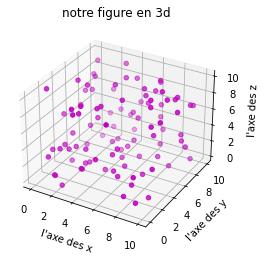

In [5]:
fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c='m')
ax.set_title("notre figure en 3d")
ax.set_xlabel("l'axe des x")
ax.set_ylabel("l'axe des y")
ax.set_zlabel("l'axe des z")
plt.show()

Notons que: comme je n'ai pas donné d'indication sur la position de la sous-figure, à la fonction `add_subplot`, la sous-figure sera considérée comme la seule sous-figure de la figure globale. C'est comme si vous avions mis *111* (1 ligne, 1 colonne, 1 figure d'indice 1). Naturellement on peut mettre plusieurs des sous-figures.
```
ax1 = fig.add_subplot(121, projection='3d') # première sous-figure de la grille 1 ligne 2 colonnes
ax2 = fig.add_subplot(122)                  # seconde sous-figure de la grille 1 ligne 2 colonnes
```

## on dessine une surface

Allons-y. Supposons que nous voulez calculer, pour la tracer, la surface d'une fonction $f:\mathbb{R}^2→\mathbb{R}$. Pour cela:
   - vous allez définir un rectangle (on ne peut pas prendre tout $\mathbb{R}^2$)
   - vous allez couvrir régulièrement cette surface par des couples de points *(x, y)*
   - vous allez calculer la fonction sur chacun des points, vous avez votre surface de points.
   - vous utilisez une fonction qui dessine la surface obtenue en 3D

À vous de jouer. Définissez, en utilisant les fonctions de la librairie `numpy`, la fonction $f(x, y) = x^2 - y^2$.

In [6]:
# votre code ici (correction juste dessous)

In [7]:
def f(x, y):
    return np.power(x, 2) - np.power(y, 2)

### on construit une grille de points

Il nous faut maintenant les appliquer la fonction $f$ à un ensemble de points couvrant le rectangle (xy du plan sur lequel nous voulons dessiner la fonction), pour obtenir l'ensemble de valeurs à dessiner en 3D.

Par exemple si je veux dessiner la fonction entre les abscisses 1 et 4 et les ordonnées 4 à 6, je vais vouloir calculer $f$ sur les points suivants (je ne donne que des valeurs entières pour la simplicité de l'exemple):

<img src='media/points-meshgrid.png' width=300>

Si on regarde en matrices `np.ndarray`, $f$ va devoir être calculée sur une sorte de produit cartésien des abscisses et des ordonnées de cette manière:

$f(\begin{bmatrix} [1 & 2 & 3 & 4], \\ [1 & 2 & 3 & 4], \\ [1 & 2 & 3 & 4] \end{bmatrix}$, $\begin{bmatrix} [4 & 4 & 4 & 4], \\ [5 & 5 & 5 & 5], \\ [6 & 6 & 6 & 6] \end{bmatrix})$

Faisons-le à-la-main:

In [8]:
v_x = np.array([[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]])

In [9]:
v_y = np.array([[4, 4, 4, 4], [5, 5, 5, 5], [6, 6, 6, 6]])

In [10]:
z = f(v_x, v_y)

In [11]:
z

array([[-15, -12,  -7,   0],
       [-24, -21, -16,  -9],
       [-35, -32, -27, -20]])

Voilà nous avons les valeurs de la surface mais franchement c'était laborieux de le faire à-la-main ! Vous aimeriez donner le vecteur des abscisses, celui des ordonnées et que la grille se calcule automatiquement i.e. donner \[1, 2, 3, 4\] et \[4, 5, 6 \] et obtenir `v_x` et `v_y` !

Cette fonction existe naturellement, elle s'appelle `np.meshgrid`. Nous allons l'utiliser tout de suite et montrer que nous obtenons la même chose:

On prend *x* et *y*:

In [12]:
x = [1, 2, 3, 4]
y = [4, 5, 6]

On utilise `np.meshgrid` pour calculer `mv_x` et `mv_y`

In [13]:
mv_x, mv_y = np.meshgrid(x, y)

on regarde qu'ils sont égaux aux `v_x` et `v_y`:

In [14]:
np.all(mv_x == v_x) and np.all(mv_y == v_y) 

True

Voilà la fonction qui fait une sorte de produit cartésien et nous rend le résultat sous la forme de 2 `np.ndarray` comme nous les voulions.

### on trace la fonction  en 3D

Maintenant nous allons appliquer `np.meshgrid` sur plus de points afin d'afficher une courbe plus intéressante.

Nous allons créer des vecteurs x et y de valeurs linéairement espacées.

In [15]:
x = np.linspace(-1000, 1000, 50) 
y = np.linspace(-1000, 1000, 50)

Nous calculons les deux matrices qui forment la grille:

In [16]:
v_x, v_y = np.meshgrid(x, y)

Nous calculons la fonction en tous les points de cette grille.

In [17]:
v_z = f(v_x, v_y)

Nous allons créer une figure générale avec `plt.figure` puis une sous-figure avec la fonction `Axes3D` (rappelez vous les sous-figures sont appelées des axis en `matplotlib`).

Nous allons afficher la courbe avec la fonction `axis.plot_surface`, ici on demande d'utiliser la table des couleurs des bleus.

/tmp/ipykernel_2294/1012412157.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


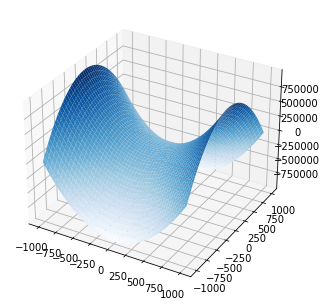

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(v_x, v_y, v_z, cmap='Blues');

On peut aussi s'amuser à afficher la fonction comme une image:

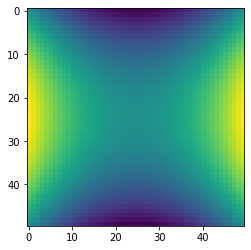

In [19]:
plt.imshow(v_z);

## exercices

### fonction par morceaux

$f(x)=\frac{(x^3−1)}{(x−3)}\ si\ x < −1$

$f(x)=x−1\ si\ x\geq -1$

Si vous avez un problème pensez à vectoriser (avec `np.vectorize` l'intérêt est de pouvoir appliquer cette fonction à des arguments *x* et *y* donnés sous la forme de `np.ndarray` et pas uniquement à des scalaires).

### la gaussienne en 3D

Visualisez la gaussienne $\Gamma(x, y)= \dfrac{1}{(2 \pi \sigma^2)}e^{-\dfrac{[(x-\mu_x)^2+(y-\mu_y)^2]}{(2 \sigma^2))}}$ avec $x$ entre $-2\pi$ et $2\pi$ et $y$ entre 0 et 5.

### une autre fonction

Visualisez la fonction $f(x, y)=\sin(\sqrt{|x^2 - y^2|})$.

## corrections

### fonction par morceaux

$f(x)=\frac{(x^3−1)}{(x−3)}\ si\ x < −1$

$f(x)=x^2−1\ si\ x\geq -1$

In [20]:
def f(x, y):
    if x<-1:
        return (np.power(x,3)-1)/(x-3)
    else:
        return np.power(x,2)-1
f(20, 34)
f = np.vectorize(f)

In [21]:
x = np.linspace(-2, 2, 50)   
X, Y = np.meshgrid(x, x)
Z = f(X, Y)

/tmp/ipykernel_2294/3367564673.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


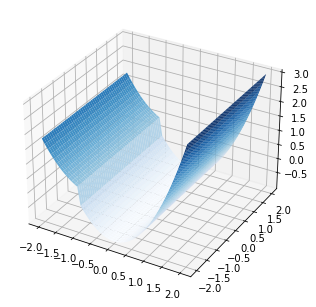

In [22]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z, cmap='Blues');

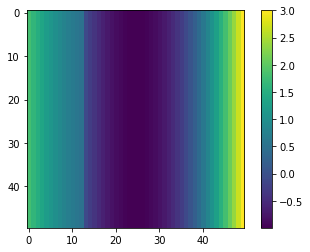

In [23]:
plt.imshow(Z)
plt.axis('on')  # to show the axis 
cc = plt.colorbar()

### la gaussienne en 3d

In [24]:
def gamma(x, y, mu_x, mu_y, sigma):
    return (np.exp(-(np.power(x - mu_x, 2) + np.power(y - mu_y, 2))
                    / (2*sigma**2))
             / (2 * np.pi * sigma**2))
x = np.linspace(0, 2*np.pi)   
y = np.linspace(0, 5)

v_x, v_y= np.meshgrid(x, y)
v_z = gamma(v_x, v_y, np.pi, 2.5, 1)

/tmp/ipykernel_2294/1012412157.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


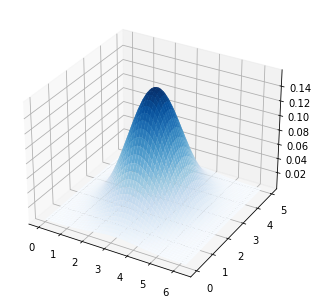

In [25]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(v_x, v_y, v_z, cmap='Blues');

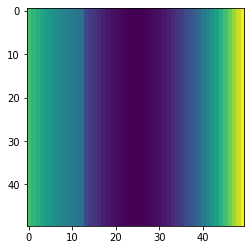

In [26]:
plt.imshow(Z)

### l'autre fonction

In [27]:
def f(x, y):
    return np.sin(np.sqrt(np.abs(np.power(x,2)-np.power(y,2))))

In [28]:
x = np.linspace(-2, 2, 50)   
X, Y = np.meshgrid(x, x)
Z = f(X, Y)

on définit un style localement dans une instruction `with`, par exemple, `ggploty` afin d'isoler ses effets dans une partie des dessins. On peut les lister avec `plt.style.available`.

/tmp/ipykernel_2294/1578321039.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


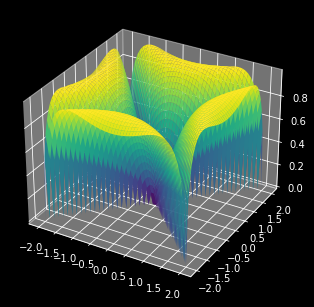

In [29]:
with plt.style.context(('dark_background')):   # set a style locally (in the body of the with)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(X, Y, Z, cmap='viridis');

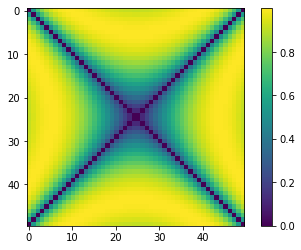

In [30]:
plt.imshow(Z, cmap='viridis')
plt.axis('on')  # to show the axis 
cc = plt.colorbar()

In [31]:
#with plt.xkcd():
#    plt.plot(np.sin(np.linspace(0, 4*np.pi)))
#    plt.title('Whoo Hoo!!!');